# 导入库

In [1]:
# encoding:utf-8
import requests
import pandas as pd
import numpy as np
import json
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import time, sys, smtplib
import pyautogui
from PIL import ImageGrab
from PIL import Image
from aip import AipOcr
import requests
from time import sleep
import datetime
from selenium import webdriver
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import random
import xlrd
from matplotlib.font_manager import FontProperties
from pylab import *
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 导入matplotlib库，使用matplotlib提供的rc()方法进行字体的设置
font = {'family': 'Microsoft YaHei',  'weight': 'bold',  'size': '14'}
matplotlib.rc("font", family="Microsoft YaHei", weight="bold", size="14")

# 筛选城市面积 - 可用可不用

In [ ]:
### 导入2019年12月31日 的星巴克门店数据

data = pd.read_csv('/Users/19723/Desktop/八爪鱼房产资料/经纬度/archive/starbucks.csv')
#读取文件
abc = data['city'].isin(['上海市', '杭州', '苏州', '南通', '启东',
                        '广州', '深圳', '香港', '澳门',
                        '北京', '天津', '成都', '重庆', '昆明', 
                        '桂林',
                       'shanghai', 'hangzhou', 'suzhou', 'nantong', 'qidong',
                        'guangzhou', 'shenzhen', 'xianggang', 'aomen',
                        'beijing', 'tianjin', 'chengdu', 'chongqing', 'kunming', 
                        'guilin'])
print(abc)
data.to_csv('./123213.csv')

In [ ]:
# 重置索引
temp = data.groupby('city')['address'].count().reset_index()
temp.to_csv('./123213.csv')

# 经纬度获取

In [2]:
#csv文件导入成列表
csv_file = np.genfromtxt('/Users/19723/Desktop/Book1.csv', 
                          delimiter=',', dtype=str, encoding = 'UTF-8')
youshould = csv_file[:,0].tolist() #逗号后面指代多少列，不加的话返回所有列
top_row = csv_file[:,1].tolist() #逗号后面指代多少列，不加的话返回所有列

In [4]:
# address list
places_ll = []


def geocoding(address, currentkey, trt):
    """
    address convert lat and lng
    :param address: address
    :param currentkey: AK
    :return: places_ll
    """
    url = 'http://api.map.baidu.com/geocoding/v3/?'
    params = {
        "address": address,
        "city": trt,
        "output": 'json',
        "ak": currentkey,
    }
    response = requests.get(url, params=params)
    answer = response.json()
    if answer['status'] == 0:
        tmpList = answer['result']
        coordString = tmpList['location']
        coordList = [coordString['lng'], coordString['lat']]
        places_ll.append([address, float(coordList[0]), float(coordList[1])])
        print([address, float(coordList[0]), float(coordList[1])])
    else:
        return -1

if __name__ == '__main__':

    # 地点
    u = youshould
    l = top_row
    for i in range(len(l)):
        geocoding(address=l[i], currentkey="6izITDpGH1sDcHIhCRNileHYEBt1YOzv", trt=u[i])
        # reverse_geocoding(116.430431, 39.937572, currentkey="*********************")

        #保存下来成为csv
        df = pd.DataFrame(places_ll, columns=['地址', '经度', '纬度'])
        df.to_csv('/Users/19723/Desktop/合肥.csv', index=None, encoding = 'UTF-8')


        
# cBT1q4l5bsmp8GnU8KBLdNDCdLNvTRc3
# 我的 6izITDpGH1sDcHIhCRNileHYEBt1YOzv
# 我的2：：： v6xGIj94AxkS77xbpTDV8yBhMioRXvZC
# wjl: tpnpkmb6gMIGSGZO29PrBHosmd4g38ng

['鑫苑远洋·臻园', 113.65691177025407, 34.74229284371981]
['裕华城', 114.53758291425729, 38.012087686284076]
['华地学府公园', 117.23017831258392, 31.838301651077348]
['空港当代阅MOMΛ', 117.33208999472431, 31.9833429714859]
['锦绣观澜', 117.29762300044251, 31.761099830946172]
['招商金茂正荣依云上城', 115.99902598218182, 28.68306302288538]
['绿地VR科创城', 115.81140849851579, 28.595345540729983]
['恒茂未来都会', 115.74493290266331, 28.69438865354762]
['中梁世茂十里晴川', 117.16043611855301, 31.96807563034681]
['富力华庭', 115.87417939261577, 28.699744589504277]
['东原阅城', 113.60177701195146, 34.832963937507145]
['正商河峪洲', 113.64845934421902, 34.815195738482416]
['郑地·美景 紫华城', 113.74825273213632, 34.792883467430876]
['新城朗隽大都会', 113.14144105754526, 28.174348458026603]
['中南国际眼镜城', 113.03731693879875, 28.075948167906663]
['楚天都市沁园', 114.29669618327924, 30.46145186109827]
['美的翰城', 112.88530792621427, 28.30439494358326]
['新力金沙湾', 114.53181983525802, 30.440647051427973]
['中交牛津街', 112.94547319535287, 28.23488939994364]
['君悦新天地', 112.98325170305418, 28.19349

['海尔地产学府', 112.52430797139989, 37.87355000218776]
['绿地·中央广场', 112.53901458005647, 37.84962244339182]
['国奥城', 112.6293160228026, 37.84833203269519]
['恒大悦府', 112.56895600100957, 37.789747001220746]
['宝湾国际', 117.29812102101724, 31.94819627241704]
['招商公园1872', 117.3936690170944, 31.908689975066327]
['乐客来国际商业中心', 117.17631447691682, 31.859258857562615]
['哈佛园', 115.81689669602719, 28.706006414745783]
['金色广场', 115.80625896218154, 28.638506992019586]
['名城紫金轩', 115.86458944231661, 28.68945529506072]
['中海锦城', 115.83425384491579, 28.754417783296667]
['首地蓝天熙郡', 115.80056604084449, 28.63924302725686]
['万科荣成兰乔圣菲', 113.99324885150034, 34.76722592534108]
['宏光合园', 113.76807096863635, 34.72444996438146]
['兴港和昌盛世城邦', 113.839404151556, 34.47556021290732]
['朗悦公园道1號', 113.63141920733915, 34.75343885045448]
['中建汤逊湖壹号', 114.3402577123746, 30.41566858588736]
['钰龙旭辉半岛', 114.23494064387643, 30.55347033471257]
['新长江CBD中心', 114.25883296535586, 30.615958859271526]
['绿地汉口中心', 114.29998802382055, 30.66348790970463]
[

['融创御湖宸院', 113.61549773031085, 34.719993458560204]
['汇泉景悦城', 113.59039296588459, 34.745766957513766]
['富力壹品', 112.59138561162709, 37.783487862909645]
['棕榈西园', 112.49534741023315, 37.89516436667284]
['元福绿都', 112.60146001809095, 37.819239143660546]
['汇泉西悦城', 113.52899998258563, 34.73283494356586]
['融信朗悦时光之城', 113.48054601219128, 34.812972950547426]
['华润翡翠府', 113.01141447908819, 28.146073059432684]
['谦祥世茂万华城', 113.58696296595586, 34.81502896295348]
['正荣青云宸院', 115.92875881843409, 28.597727391102634]
['美生新悦城', 117.32511402362547, 31.747456966086745]
['利港银河广场', 117.31173672746253, 31.748688901152416]
['美高东郊紫园', 116.10068092857388, 28.67225375798973]
['博长山水香颐', 113.05353934816752, 28.098718566082642]
['滨江上品', 115.83693600550659, 28.575162996081612]
['新宇盛世广场', 115.79322410008331, 28.634908531229485]
['新站广场', 117.33473415699292, 31.945859708001567]
['佳源巴黎都市三期', 117.31209811576919, 31.739479386799772]
['海玥珑府', 115.82081223008278, 28.708155409211834]
['翡翠天际', 117.32926518321763, 31.81805723373631

['金龙湾小镇', 115.79085571760703, 28.67989050585712]
['华中国际广场·云邸', 114.29397916843375, 30.629448369188502]
['远大·凤玺湾', 112.5263941062857, 37.825084570559376]
['北辰蔚蓝城市', 114.27400300982507, 30.764113887061367]
['汉街总部国际万达尊写字楼', 114.34142065868781, 30.564674010088847]
['万科金域学府', 114.36248897713553, 30.51620688883593]
['青年说', 114.1984810283124, 30.53809292099303]
['高速滨湖时代广场金融中心', 117.2917122400174, 31.729579379034746]
['煌盛熙岸大境', 115.95738296417787, 28.70749003593329]
['青竹湖曦园', 112.97949355212387, 28.3510961058239]
['中正·亲贤们', 112.56557136550906, 37.828258531058374]
['文德公园里', 117.46890902050747, 31.872420799512852]
['永恒·金水公馆', 113.68334701497113, 34.829700942278706]
['光明观澜公馆', 117.15870104146047, 31.78394494896184]
['安粮国贸中心', 117.26040269977263, 31.824042484963122]
['美麟国际公馆', 113.88087038304933, 34.703679921305984]
['世茂璀璨天城', 113.03460001378471, 28.154756010018556]
['敏捷珑玥府', 113.1446119861639, 28.224933972903976]
['国购中心', 117.29457603798322, 31.759197138021847]
['荣寓', 113.63141920733915, 34.75343

['正商善水上境', 113.77933392312046, 34.796814151102886]
['中海新城熙岸', 112.99067296419184, 28.071329962979718]
['中国健康谷', 114.1211424035669, 30.543892348645326]
['万科紫院', 112.60968678978188, 37.869138454197724]
['万科蓝山', 112.51121328215038, 37.832028298707634]
['金沙湖高尔夫观邸', 113.76348835290777, 34.69836073436206]
['太原万科城', 112.60714530383305, 37.80375554623567]
['东润·知寓', 112.63208397157051, 37.808400042723406]
['万科广场', 112.56717627813319, 37.89078431030652]
['万科太原小镇', 112.50832136722211, 37.9399283782295]
['正商智慧城', 113.70231006462568, 34.64876516863857]
['欣隆湖滨半岛', 114.5770433193774, 30.706456291891456]
['宜佳上东城', 112.60728184627057, 37.88371444108566]
['绿地悦滨江', 115.83227874059165, 28.74948293160005]
['九龙城天誉龙邸', 113.612652347608, 34.78452428153343]
['新城公馆', 115.90442533912675, 28.70182773512419]
['阳光城蓝光文澜府', 115.97094360449091, 28.609525154474632]
['南昌轻纺城', 115.95046017276752, 28.551604186108275]
['龙湖春江郦城', 115.96390978251956, 28.65066005903711]
['鼎鑫中心', 117.25177582280756, 31.887392532023277]
['联投金色港

['锦豪名都', 113.59691798761743, 34.687993360167184]
['融信·时光之城', 112.58621038375357, 37.93934206436012]
['欢乐颂', 112.53036201155383, 37.84384601323076]
['洪城大市场', 115.85461501725933, 28.612559427846705]
['全景外滩二期', 114.39581512341964, 30.882692004989046]
['F绿岛', 114.26107666302813, 30.73964123733148]
['中国铁建洋湖壹品', 112.91527800310321, 28.132348997237106]
['保利大都汇', 113.02769770373999, 28.167266204902013]
['禹洲翡翠湖郡', 117.20217345864926, 31.765410198852624]
['康桥林语镇', 113.63141920733915, 34.75343885045448]
['信地华地城', 117.17138942712782, 31.78600404886472]
['恒大帝景', 117.26037943365992, 32.03440730203711]
['都会轩', 114.29223501845557, 30.588594868726467]
['三和名仕城', 114.0868360263103, 30.595392922403427]
['中南熙悦', 114.12851758163437, 30.645924692395823]
['太原红星天铂', 112.61309100834248, 37.84596599501763]
['蜀山凡高', 117.13107976397858, 31.857825378766428]
['文一品一墅', 117.21530704452732, 31.825261961576487]
['和昌集团中央悦府', 117.15694503384957, 31.78731795354621]
['万科中心', 117.25198099578604, 31.885566969665057]
['新力菩悦星都汇

['联投V中心', 117.3076296746709, 31.714324466335707]
['合肥海恒金屿海岸', 117.2635780300893, 31.76090495046182]
['世茂君望墅', 117.23344266497664, 31.826577833686887]
['祥源城湖山别墅', 117.1342830315966, 31.8372389513894]
['太原恒大森林海', 112.57930996014812, 37.88216068684096]
['弘阳中梁时光天樾', 115.92284194953348, 28.69113806097445]
['皖投国滨世家', 117.19443338888362, 31.70883999048874]
['置地创新中心', 117.13971867823749, 31.855582724437227]
['望江台', 117.16759327787321, 31.43737645282781]
['力高君誉滨江', 115.88137374178172, 28.664176694104594]
['招商花漫里', 117.34568252488742, 31.745422333201503]
['北龙湖·金茂府', 113.75488501154705, 34.80166595766274]
['金科·御府', 113.76298179843069, 34.43205301566169]
['御江壹品青山樽', 114.3800600125718, 30.636048855640684]
['银润·碧桂园·酩悦滨江', 113.70020605346019, 34.85622179367109]
['荣兴天成', 112.5560130355607, 37.980301038709136]
['绿城武汉黄浦湾', 114.32609978872348, 30.625270868777726]
['建业江山汇', 118.63358329792732, 28.74286848011839]
['碧桂园培文府御园', 112.87037799881283, 28.29142602201515]
['红星国际公寓', 113.01150853167506, 28.12644583

['武汉诺德逸园', 114.28849097092055, 30.760430876251792]
['保利恒伟时光印象', 112.86706172436273, 28.238368533700203]
['保利洪都里', 115.93300933061425, 28.639914227879636]
['高速时代公馆', 117.30745198984104, 31.726590932289177]
['上街碧桂园', 113.70020605346019, 34.85622179367109]
['家天下北郡', 117.3435998933931, 31.945966181393146]
['华南城紫荆名都馨园', 117.1062390115417, 31.776209980907453]
['海亮九台别墅', 117.14728950724502, 31.852575614939184]
['保利海上五月花', 117.30240441118046, 31.71044160864193]
['力高雍湖国际', 116.0157485680584, 28.713014302390217]
['滨湖东方汇', 117.26879143594701, 31.88480728519787]
['金大地翡翠公馆', 117.27436901485846, 31.967263333108107]
['宏江溢彩年华', 113.59764300999453, 34.76277293387814]
['康苑雅居', 112.58397360303373, 37.750423671153364]
['北雁湖金茂湾', 117.14734502252554, 31.823839991517268]
['旭辉公园府', 117.39227700287613, 31.90474998983947]
['滨湖凡高', 117.28237219830795, 31.74916369224603]
['皖投万科天下艺境', 117.37713902791363, 31.944095984956]
['城建琥珀蜀熙府', 117.21968969744941, 31.869345400418467]
['碧桂园中堂', 117.32343419232181, 31.757424356

['湖南文化广场', 113.00385074669668, 28.1958843111983]
['中建亮月湖', 112.53421473979377, 28.266264843543166]
['印湘山', 113.11372968002988, 28.07574187568758]
['正荣悦玺', 113.02321201517739, 28.169431937707227]
['金星创寓SOHO/创寓金街', 112.89631603142156, 28.320228388675787]
['绿地公馆', 112.99354403843135, 28.108436702942743]
['东友星座', 113.0015930354592, 28.17425699033588]
['潇湘奥林匹克花园', 112.87684570865198, 28.236901471839495]
['拿铁空间', 113.0036537482984, 28.15499590794114]
['蓝湾国际广场', 112.97807539721575, 28.171181273569786]
['丽丰铂羽公馆', 117.15454503101856, 31.709898958504315]
['高盛华成', 112.89347361312782, 28.20625391651331]
['紫云赋', 117.34582598427738, 31.746301935164126]
['江山印', 118.61213697252808, 28.694386039553237]
['联诚现代城', 112.829326514987, 28.357762329117776]
['文一名门北郡', 117.25803566475383, 31.977292440269053]
['闽商国贸中心', 117.33563102521408, 31.86669999591306]
['金鹏珑璟台', 117.41466699822068, 31.874901987485245]
['滨湖一号', 117.32571813408093, 31.77567884743227]
['美好上院', 117.419995117692, 31.85484272613231]
['中昂·博雅', 11

['中建·澜溪苑', 113.74962354634455, 34.71255277442378]
['华发峰景湾', 113.59778179819583, 34.773497481375486]
['永威双鹤湖畔', 113.5360429672755, 34.74709694420606]
['浩创梧桐华府', 113.84158002716227, 34.39769897769955]
['正弘三和里', 113.70836832681552, 34.61452277504796]
['威尔公寓', 113.63141920733915, 34.75343885045448]
['浩创·优悦', 113.95962689321178, 34.68512181053529]
['正荣御首府', 113.72318246264166, 34.632791437134465]
['弘福园', 117.03343197877186, 31.754225956241854]
['东亚·京尊', 113.69621470241826, 34.70973475613889]
['金兰西景苑', 113.55672770927046, 34.814201451969495]
['奥园·悦城', 113.64918445642668, 34.721841971414456]
['恩淇·懿品悦府', 113.4204848566414, 34.54895316242457]
['水墨林溪', 112.98200449568455, 28.134685387447536]
['武地建发玺院', 114.51202603266788, 30.541674934288142]
['尚泽琪瑞东郡', 117.43990408304855, 31.880921918762432]
['置地广场栢悦府', 117.23278609347939, 31.80622295616028]
['金大地天元府', 117.30820360206124, 31.760729565347116]
['叠彩兰亭', 113.02279151836831, 28.16120201293361]
['金鹰玖瓏山', 112.88673704044962, 28.22043699863468]
['长房东云台'

['玉兰先禾', 113.5665000155913, 34.81131395158924]
['兴港永威南樾', 113.87201057546552, 34.585401344554306]
['勤诚达境界城', 112.92981195743599, 28.29753696971438]
['融侨中原城', 113.6329309656819, 34.75944960148917]
['西亚斯·宫馆', 113.77953047236606, 34.40884747951209]
['康桥那云溪', 113.70389898741172, 34.59094701209234]
['金林·双玺', 113.71417452447926, 34.7622510077765]
['东原·满庭芳', 114.01031719517323, 34.714451452985635]
['禹洲绿城蘭园', 117.2024435791161, 31.845483005105525]
['佳兆业浣溪璞园', 114.33166146762741, 30.54270958368797]
['保利心语', 113.600585499523, 34.751778049617876]
['长房梅溪香山', 112.90666217529876, 28.187205369986437]
['谷山里', 112.92717965280097, 28.24973828779735]
['联诚国际城', 112.82736829880643, 28.362165398170593]
['中铁水映加州', 112.97328886613796, 28.338655935671046]
['中辰未来港', 117.32391999594161, 31.790277949106848]
['学林雅苑', 117.20586863836455, 31.764586655560052]
['顺天御岭', 112.98172368538222, 28.292664906717437]
['喜尔美大厦', 117.14032997513702, 31.856508653150893]
['绿地天河国际会展城', 114.30892930771411, 30.70146239420439]
['武汉青创城'

['武汉万象城华润置地大厦', 114.38730304989876, 30.88778262486829]
['碧桂园天玺', 113.74693410947823, 34.73332079124927]
['康桥山海云图', 113.6825877671541, 34.87082706017905]
['正商澜汀府', 113.30713307417032, 34.834640051498205]
['融创银基·国际旅游城', 113.55653502273856, 34.48978401983482]
['中骏·云璟', 113.63141920733915, 34.75343885045448]
['瀚宇·书香府', 113.50057220641686, 34.81664817519867]
['保利雲上', 113.00341102614969, 28.044091000425134]
['正商书香铭筑', 113.85656897324066, 34.77998395348838]
['绿城华生桂语朝阳', 114.19539597769949, 30.625181912732536]
['中锐滨湖尚城', 114.34669595779516, 30.386916981536725]
['正弘铂悦', 113.74303995509248, 34.39882624169896]
['新田城燕和园', 113.4838805222443, 34.68444726340481]
['长高圆梦佳苑', 112.92077545316135, 28.294632779112536]
['五矿万境园', 113.04246198360545, 28.115612016458435]
['新城庭瑞君悦观澜', 114.06734800691574, 30.324289994821378]
['爱家名校华城', 114.26416207296326, 30.42844312929536]
['中国铁建洋湖垸', 112.91432696706012, 28.13149097531046]
['正荣悦珑府', 114.31158155473231, 30.598466736400987]
['武汉大悦城', 114.02168201750214, 30.583204

['北大资源.未名府', 113.72835158203772, 34.78327094879402]
['华地.泓府', 113.1504980576509, 34.40373678767698]
['恒达·金汇广场', 112.99380348347616, 34.75499685400959]
['金明华府', 113.72191908577243, 34.75104962667075]
['许昌正商书香华府', 113.82657814548453, 34.81672693084807]
['中南拂晓城', 114.27760934712542, 30.766401092826296]
['云峰中心', 113.64505611379447, 34.81971277337672]
['龙城裕府', 120.44356686930357, 41.59846852304986]
['一峰国际都汇', 113.63141920733915, 34.75343885045448]
['中国铁建山语城三期', 112.97532900778099, 28.295090629394387]
['恒鑫山水卿卿', 112.97973438783102, 28.291989962866047]
['保利香槟国际', 113.05673201577949, 28.27465702414983]
['阳逻港华中国际产业园', 114.56401824880491, 30.657131707423535]
['韵湖星光', 114.38939996445069, 30.4587479292469]
['揽胜公园', 114.35190038059777, 30.488199688417957]
['中顺太和广场', 121.11045324939532, 41.11510930713197]
['金鸿宇国际商业广场', 113.02783020380267, 28.18307048252457]
['半山公馆', 113.05216898311252, 28.160976858094152]
['美洲故事', 113.0464103956427, 28.12548669816409]
['喜盈门范城', 113.04113797111474, 28.13960901511147]

['联投龙湾四期', 114.32492884749122, 30.43353337024096]
['光谷one39', 114.42746359433333, 30.502701153094325]
['名士华府', 114.20300354740237, 30.54790513441932]
['武久阳光城', 114.57696804137565, 30.67652486431169]
['菩提苑一期', 114.3295667090087, 30.421391378515]
['美联联邦生活区二期城仕', 114.28423488924481, 30.637996170558772]
['奥特莱斯V公寓', 114.46788240160203, 30.48364483326214]
['卓尔生活城二期湖湾', 114.31341239119222, 30.69644696399954]
['梦想特区宏图里', 114.2829949581494, 30.675819884201594]
['天宇万象国际二期', 114.20727499010232, 30.611716899954015]
['博学尚品', 114.1662228774491, 30.508745871087218]
['华发峰尚', 114.58991495936876, 30.67394283670117]
['长投珑庭', 114.3379551756914, 30.530907963533835]
['都市礼寓', 114.27292342626318, 30.622427031325078]
['洛浦七悦府', 113.4204848566414, 34.54895316242457]
['博群·上和境', 113.63141920733915, 34.75343885045448]
['建业·中州上院', 113.72118031932104, 34.75068437469458]
['汴梁小宋城二期观宋项目', 113.63141920733915, 34.75343885045448]
['湖滨美院', 113.61353969379076, 34.7452627937742]
['华芳福昌郡', 113.63141920733915, 34.75343885045448

['民安尚郡', 113.68050073396277, 34.72989502523589]
['康桥康城', 113.64666300269073, 34.67984201387767]
['新城尚郡', 113.60331598895115, 34.75269798574244]
['万锦城', 113.75878895746285, 34.72863900121249]
['五建新街坊', 113.59926418194839, 34.76884534377478]
['正弘澜庭叙A区', 113.69161385108781, 34.86597825414792]
['万科大都会三期', 113.65905198313159, 34.66341397217201]
['鑫苑名城', 113.6368079624324, 34.67538998491331]
['鑫苑国际新城', 113.6906450285953, 34.70885899718251]
['润丰聚尚', 113.80612866970264, 34.48971558693082]
['中国电建湘熙水郡一期', 112.95319781426117, 28.120928868735174]
['合能璞丽', 112.88669607771838, 28.197053483448173]
['惠天然梅岭国际', 112.88788803929917, 28.19850637485964]
['合能洋湖公馆三期', 112.94788793039345, 28.13715216718599]
['中冶天润菁园', 112.8614079691459, 28.221353023215094]
['翡翠华庭', 112.91099227734708, 28.218068443084803]
['旭辉香樟公馆', 113.02754696807547, 28.144987332023028]
['方略城市广场', 113.11101544993237, 28.25241326650466]
['湖湾世景', 113.10485118769438, 28.256377920469017]
['振业城', 112.91277765954756, 28.20575302429997]
['绿地海外滩', 1

['财汇新天地', 113.14270299712527, 28.17734702607299]
['长沙平吉上苑', 113.08755916595523, 28.251818487944462]
['万科金色梦想', 112.86759702461595, 28.213251038657294]
['长沙恒大文化旅游城', 113.08755916595523, 28.251818487944462]
['恒大上林苑', 113.02994697090568, 28.094056020485883]
['恒大誉府', 113.05824170801905, 28.155752383030507]
['新城金茂梦想玺悦', 112.91620613235581, 28.198496744694694]
['恒大城', 114.17333368420498, 30.66484166629369]
['青城荟', 114.41429650165973, 30.636797863455257]
['F绿岛艺墅', 114.26107666302813, 30.73964123733148]
['丰泽园别墅', 114.21774707641545, 30.63507790223584]
['源江富督苑', 114.58261299320036, 30.659049858105067]
['联投半岛', 114.14498397078503, 30.496283961821234]
['长城达尚城', 114.4567028996998, 30.451502412855803]
['五环时尚广场', 114.14521025394299, 30.648124086454665]
['万科翡翠云台', 114.36696649111946, 30.5084835792128]
['新亚花园', 114.57969583588725, 30.653497771252884]
['新长江香榭北郦湖', 114.2829724106811, 30.728567755206004]
['世茂林屿岸', 114.32595201746709, 30.45438796744887]
['恒达盘龙湾桂苑', 114.27100581349103, 30.729925789680006]


['碧桂园山湖城', 112.69118913608301, 28.2549466658332]
['世方水岸', 113.02301169304873, 28.24560481238984]
['建发中央公园', 112.99603998029, 28.163627970234344]
['江景华府', 113.02217366383876, 28.250418991074635]
['麓山翰林苑', 112.9369604031904, 28.165748238952297]
['星城雅郡', 113.06533535713736, 28.228604232832993]
['时代星空', 113.0887077393799, 28.23104670549475]
['嘉华城', 113.02174095007474, 28.082669059334563]
['雅居乐花园', 112.95438106227853, 28.31402534434711]
['中安善化国际', 113.0936494078192, 28.320085215656807]
['君奕国际公馆', 114.22448400841809, 30.610631865598535]
['富强都市乾元', 114.02336104033085, 30.58230388325896]
['爱家国际华城', 114.37158333228798, 30.59804848650949]
['新力帝泊湾', 114.23931709849049, 30.72838165354216]
['武汉江山', 114.36478100364424, 30.62950686781741]
['当代安普顿小镇', 114.3839808466312, 30.464042331660263]
['庭瑞时代', 114.27479136274063, 30.6135007617439]
['天宇万象国际', 114.207942880249, 30.6103528347988]
['光谷新界', 114.43684522758788, 30.51035079865518]
['和昌都汇华府', 114.22129619165483, 30.520668117865625]
['保利新武昌', 114.34190834

['江尚CC中心', 114.34489503490876, 30.6005338681334]
['万科金域时代', 114.28347896515817, 30.61184192210103]
['创意天地写字楼', 114.32950104287592, 30.474520937625485]
['财富广场', 114.16756638316983, 30.498500088612595]
['现代城四区', 114.33298377333809, 30.647774016766625]
['光谷8号工坊二期', 114.42744401127322, 30.4367349613966]
['当代东湖壹号', 114.36534316323237, 30.567576852568862]
['中海光谷锦城', 114.45338303202658, 30.43295193781514]
['绿地国际金融城写字楼', 114.33194596098242, 30.588188855698608]
['纽宾凯公园里', 114.2253321884806, 30.566009261670537]
['蓝色星城', 114.29672879176924, 30.80544966457257]
['武昌府二期', 114.32254851755089, 30.559566983522483]
['鄂旅投书院世家', 114.26118697494476, 30.43230098467927]
['绿地国际金融城', 114.33194596098242, 30.588188855698608]
['绿地悦澜湾二期', 114.22259630921941, 30.533178973267617]
['龙阳1号', 114.21811969354098, 30.554856666879267]
['当代阳逻满庭春MOMΛ', 114.57922620176664, 30.664725022807517]
['城投四新之光', 114.23050615872643, 30.51852273421476]
['名流公馆', 114.25648838797483, 30.54758618908183]
['金色港湾双湖泊岸', 114.19684826821747, 30.5

['统建天成美景', 114.44324143231059, 30.49042868259709]
['宝业光谷丽都', 114.38676226998174, 30.46873732870033]
['葛洲坝城市花园', 114.25963263692084, 30.580031158416976]
['俪湖天地', 114.32030931140616, 30.411965247747748]
['保利蓝海郡', 114.38106539609856, 30.499433294016]
['光谷自由城', 114.38637869352898, 30.47418190671348]
['国创光谷上城', 114.45421603072599, 30.491996183114715]
['武汉新航城', 114.29890673347818, 30.803565162739755]
['新澳蓝草坪', 114.20947197588808, 30.559010878703358]
['金地格林东郡', 114.4122543837439, 30.49132796795162]
['联投喻园', 114.43435638234195, 30.51599455160908]
['恺得南湖国际', 120.7896100517546, 30.751546813315446]
['阳光上城', 114.31605574498587, 30.505955521841297]
['名湖豪庭', 114.38663309364941, 30.464000152536425]
['兴宸深港国际', 114.57960968838884, 30.68189330488446]
['一品国际', 114.29154341304344, 30.71179953226967]
['武汉半山逸品', 114.5860378727877, 30.684886390794794]
['辉阳凤凰城', 114.31482335965673, 30.562266685566883]
['龙苑澜岸', 114.42720910438236, 30.40825110001236]
['华鼎尚都国际', 114.23544315597871, 30.598384516480856]
['武湖新天地', 

['华发中城峰景湾', 114.60354970989086, 30.68999093544886]
['越秀逸府', 113.27342648099675, 23.13526012014849]
['保利大都会尚湖', 114.37320252796972, 30.51625985640083]
['红枫金座', 114.41590743293078, 30.49039180541661]
['万科高尔夫熙岸', 114.21885396846484, 30.656478853297067]
['联投龙湾五期', 114.32492884749122, 30.43353337024096]
['华发中城中央公园', 114.60917912103024, 30.70624049433571]
['绿地汉口中心S6号楼', 114.29998802382055, 30.66348790970463]
['愿景城A区', 114.25033203082329, 30.6660548433089]
['沌口天地', 114.15915402156052, 30.490764933367934]
['金拓银湖时代', 114.23228004261698, 30.662570898030914]
['龙湖光谷城', 114.50594899589287, 30.486774894546024]
['兰亭风华', 114.07447695944292, 30.351650010763574]
['德成中心', 114.35865357193012, 30.571675089833008]
['福星惠誉福星华府峯境', 114.2574640375892, 30.640515860241894]
['融创融汇广场', 114.30397712909871, 30.603903741326825]
['穿越伍仟城国际文化创意园', 114.2183147156672, 30.60253668978185]
['汉悦府坤璟', 114.31569103294882, 30.65714203686656]
['嘉地珑墅', 114.16690100827859, 30.50345291302106]
['中粮光谷祥云', 114.48854495545089, 30.4885308

In [4]:
# 反向获取经纬度以获取区
# address list
places_lll = []


#csv文件导入成列表
import numpy as np
csv_file = np.genfromtxt('/Users/19723/Desktop/合肥.csv', 
                          delimiter=',', dtype=str, encoding = 'UTF-8')
top_row = csv_file[:].tolist()

long_row = csv_file[:,1].tolist() #逗号后面指代多少列
lat_row = csv_file[:,2].tolist()

def reverse_geocoding(lng, lat, currentkey):
    """
    lat and lng convert address
    :param lng: longitude
    :param lat: latitude
    :param currentkey: AK
    :return: places_lll
    """
    url = 'http://api.map.baidu.com/reverse_geocoding/v3/?'
    params = {
        "location": str(lat)+','+str(lng),
        "output": 'json',
        "ak": currentkey,
#         "coordtype": "wgs84ll",
    }
    response = requests.get(url, params=params)
    answer = response.json()
    if answer['status'] == 0:
        tmpList = answer['result']
        address = tmpList['formatted_address']
        print([lng, lat, address])
        places_lll.append([address, lng, lat])
    else:
        return -1
    
    
if __name__ == '__main__':

    # 地点
    l = long_row
    g = lat_row
    for i in range(len(l)):
        reverse_geocoding(lng=l[i], lat = g[i], currentkey="6izITDpGH1sDcHIhCRNileHYEBt1YOzv")
        # reverse_geocoding(116.430431, 39.937572, currentkey="*********************")

        #保存下来成为csv
        df = pd.DataFrame(places_lll, columns=['地址', '经度', '纬度'])
        df.to_excel('/Users/19723/Desktop/monitoring_station111.xlsx', index=None)


['经度', '纬度', '']
['116.48531973287048', '39.916110785271755', '北京市朝阳区建国路甲87号']
['121.44643136775981', '30.973080134961187', '上海市奉贤区大叶公路3527号']
['121.38378408047726', '31.181604861635535', '上海市闵行区金雨路78号']
['121.3980403685817', '31.154635151475848', '上海市闵行区古龙路']
['121.39309564590204', '31.288593657262215', '上海市普陀区古浪路391弄1号']
['121.2728145143881', '31.157272327537516', '上海市青浦区前云路']
['121.281020086069', '31.168306639438576', '上海市青浦区联民路']
['121.32589179375066', '31.289441508140172', '上海市嘉定区杨子路277号']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.5213522032252', '31.232930883071578', '上海市浦东新区浦东南路1138号-1楼']
['121.43098680112675', '31.20685905973429', '上海市长宁区淮海西路442弄-134-1号-临']
['121.44469898558383', '31.405662080085595', '上海市宝山区白沙园路']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.92898680466236', '30.92201136391855', '上海市浦东新区临港大道']
['121.31201602786024', '31.3173458521

['121.45076712913428', '31.18404410101073', '上海市徐汇区天钥桥路980号']
['121.29387097520309', '31.18484486083529', '上海市青浦区盈港东路']
['121.21149492264931', '31.293619472098847', '上海市嘉定区沪霍线辅路']
['121.32635055837461', '31.152416265987686', '上海市松江区涞寅路']
['121.275932981966', '31.281491851620334', '上海市嘉定区环球三路']
['121.10947795910315', '31.167966828947666', '上海市青浦区胜利路501号']
['121.59300401510923', '31.049208884466214', '上海市浦东新区航三路']
['121.75749920484095', '31.18086408709125', '上海市浦东新区晨阳路200弄']
['121.54211213339134', '31.279634203379153', '上海市杨浦区双阳路160弄-37号']
['121.24969302886679', '31.35605532761152', '上海市嘉定区洪德路1211号']
['121.38638539357305', '31.190146478263184', '上海市闵行区虹中路489弄3A-4A']
['121.53863119954018', '31.263405272014694', '上海市杨浦区龙江路390号']
['121.34285970686754', '30.752538463756252', '上海市金山区蒙山北路515号']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.14127006906789', '31.165479740193277', '上海市青浦区华浦路321号']
['121.32207525296097', '31.168186906398564', '上海市青浦区方家塘路']
['121.578424

['121.46721402505536', '31.161618890163208', '上海市徐汇区龙水南路148号']
['121.2005962310495', '31.29573364793739', '上海市嘉定区荣轩路']
['121.28667042772678', '31.120082190650837', '上海市松江区东市北弄']
['121.53338500553136', '31.21458884206688', '上海市浦东新区东方路1531-2-临']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.5162918686264', '31.348929129991905', '上海市杨浦区恒学路']
['121.25390724950574', '31.819928942057746', '上海市崇明区X501(北沿公路)']
['121.47534198314018', '31.2138239300639', '上海市黄浦区泰康路246']
['121.28631290213379', '31.414666508867676', '上海市嘉定区顺宁路']
['121.29342397838133', '31.33989589821417', '上海市嘉定区宝安公路3136弄-23号']
['121.46649618912234', '31.0440082956631', '上海市闵行区剑川路']
['121.51129818829642', '31.21944577549958', '上海市黄浦区董家渡路150号']
['121.46342506224482', '31.303164203346547', '上海市静安区寿阳路117号']
['121.31918324820215', '31.166574666817958', '上海市青浦区诸光路311弄7号']
['121.51967857022956', '31.351407332959266', '上海市宝山区军工路4045号']
['121.45330762694705', '31.23720485180296', '上海市静安区武定路801号']
['106.6764407

['121.44418102262676', '31.230764877142445', '上海市静安区万航渡路356弄7号']
['121.6114790153802', '31.229605855406973', '上海市浦东新区翠柏路']
['121.56414109975142', '31.209731193380225', '上海市浦东新区龙阳路2000']
['121.29684230033845', '31.206330056187653', '上海市闵行区天山西路']
['121.34112804333596', '31.13080187141113', '上海市松江区虬泾路']
['121.52394201801046', '30.975341875008365', '上海市奉贤区环秀路']
['121.24511301822416', '31.39714186004231', '上海市嘉定区平城路']
['121.51472836788626', '30.975867534687428', '上海市奉贤区北行路']
['121.76639503447572', '31.063888052618307', '上海市浦东新区听民路']
['121.21632385374873', '31.023341943494184', '上海市松江区荣乐西路126']
['121.70489102061572', '31.397140858288388', '上海市崇明区凤蓉支路']
['121.23221559686465', '31.107623588952805', '上海市松江区']
['121.58794170423829', '31.33926255222845', '上海市浦东新区莱阳路']
['121.47922643582643', '31.19997815118013', '上海市黄浦区龙华东路839号']
['121.49465061092441', '31.25313008788936', '上海市虹口区周家嘴路318号']
['121.49997199310441', '31.113021856962096', '上海市闵行区浦申路']
['121.545106005995', '31.302370858340208', '上海市杨浦区

['121.57551499496601', '30.861878854202445', '上海市奉贤区X429(海兴路)']
['121.32635055837461', '31.152416265987686', '上海市松江区涞寅路']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.0331154331248', '30.913363145922446', '上海市金山区枫兰路']
['121.49759965808312', '31.234778421256912', '上海市黄浦区人民路437号']
['121.18970005470511', '31.444703284783714', '上海市嘉定区胜辛北路3199号']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.32538550876524', '30.751565434496907', '上海市金山区龙轩路']
['121.46926755145117', '30.936477692604015', '上海市奉贤区航南公路']
['121.20401482249827', '31.039962223656538', '上海市松江区三新北路900弄-682号']
['121.92800702284262', '30.928315829039256', '上海市浦东新区铃兰路']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.34243462870022', '30.747556132641815', '上海市金山区浩源路299']
['121.44960130824343', '31.177599697131154', '上海市徐汇区龙漕路235弄-5-22号']
['121.33789099943075', '31.286340836093345', '上海市嘉定区武威路']
['121.1960819763702', '31.009226814081345', '上海市松江区仓华路']


['121.20401482249827', '31.039962223656538', '上海市松江区三新北路900弄-682号']
['121.39377907673403', '31.11350300197212', '上海市闵行区莘朱路237号']
['121.55790003239031', '31.123249889802146', '上海市浦东新区康涵路']
['121.46277441956394', '31.25351512379603', '上海市静安区秣陵路202号']
['121.3221168445061', '31.203341296034353', '上海市闵行区锡虹路']
['121.39186559616722', '31.11969621976509', '上海市闵行区碧秀路74号']
['121.48053886017651', '31.235929042252014', '上海市黄浦区人民大道200号-1321室']
['121.31884764126362', '31.013833852677767', '上海市松江区影佳路']
['121.48022310578976', '31.26889882355579', '上海市静安区东宝兴路854号']
['121.9063220176623', '30.90010681647602', '上海市浦东新区方竹路']
['121.13065524200923', '31.181901834042787', '上海市青浦区崧泽大道']
['121.31884764126362', '31.013833852677767', '上海市松江区影佳路']
['121.45666800819878', '31.275215032443636', '上海市静安区普善路1053号']
['120.97627407401433', '30.55405889273315', '浙江省嘉兴市海盐县创业路']
['121.4398408595553', '31.62377260540171', '上海市崇明区崇明大道']
['121.47491052700374', '31.028743265970782', '上海市闵行区兰香湖绿道']
['121.40118803108868', '31.2662

In [ ]:
origin1 = origin['abstract'].str.extract(r'】(.*)', expand=False)

# 数据整合

## 新房

In [3]:
#遍历目录下所有文件
list1 = [] #文件名列表
list2 = [] #df列表
folder_list = os.listdir('/Users/19723/Desktop/二手房数据//')#   folder_path为此时文件路径          lisidir 获取路径中的文件夹中的每个文件           
for folder in folder_list:#遍历里面每个文件
    new_folder_path = os.path.join('/Users/19723/Desktop/二手房数据//', folder)        #根据子文件夹，生成新的路径   path.join 为前面的folder_path+后面的folder  例如：C:\CHE\+ 1.txt = C:\CHE\1.txt  即遍历后获取每个txt文件的绝对路径                   
    list1.append(new_folder_path)

for i in range(0, 1): # df1-13 变量名称赋值
     locals()['df'+str(i)] = pd.read_excel(list1[i])
     list2.append(locals()['df'+str(i)])

df = pd.concat(list2)
df1 = pd.DataFrame()
df1 = df1.assign(City = df['城市'])
df1 = df1.assign(Estate = df['小区名称'])
df1 = df1.assign(Prc = df['均价'])
df1 = df1.assign(totalprc = df['总价'])
df1 = df1.assign(long = df['经度'])
df1 = df1.assign(lat = df['纬度'])
df1 = df1.assign(Strict = df['所在区域'])
df1 = df1.assign(Type = df['装修'])
df1 = df1.assign(area = df['面积'])
df1 = df1.assign(rooms = df['房型'])
df1 = df1.assign(Beg = df['建筑类型'])

### drop
# df2 = df.drop(columns=['采集时间', '全部图片url', '户型图', '热评人', '页面网址'])
# df2.to_csv('/Users/19723/Desktop/tett.csv', encoding='UTF-8')


df1.to_excel('./新房信息汇总.xlsx')

## 二手房

In [ ]:
#遍历目录下所有文件
list1 = [] #文件名列表
list2 = [] #df列表
folder_list = os.listdir('/Users/19723/Desktop/二手房数据//')#   folder_path为此时文件路径          lisidir 获取路径中的文件夹中的每个文件           
for folder in folder_list:#遍历里面每个文件
    new_folder_path = os.path.join('/Users/19723/Desktop/二手房数据//', folder)        #根据子文件夹，生成新的路径   path.join 为前面的folder_path+后面的folder  例如：C:\CHE\+ 1.txt = C:\CHE\1.txt  即遍历后获取每个txt文件的绝对路径                   
    list1.append(new_folder_path)

for i in range(0, 3): # df1-13 变量名称赋值
     locals()['df'+str(i)] = pd.read_excel(list1[i])
     list2.append(locals()['df'+str(i)])

df = pd.concat(list2)
df1 = pd.DataFrame()
df1 = df1.assign(City = df['城市'])
df1 = df1.assign(Estate = df['小区名称'])
df1 = df1.assign(Prc = df['单价'])
df1 = df1.assign(totalprc = df['总价'])
df1 = df1.assign(Strict = df['所在区域'])
df1 = df1.assign(Stairs = df['所在楼层'])
df1 = df1.assign(Type = df['建筑类型'])
df1 = df1.assign(area = df['建筑面积'])
df1 = df1.assign(Year = df['建筑年份'])
df1 = df1.assign(rooms = df['户型结构'])
df1 = df1.assign(Time = df['上次交易'])
df1.to_excel('/Users/19723/Desktop/二手房信息汇总.xlsx')

## 租房

In [ ]:
import pandas as pd
import os
#遍历目录下所有文件
list1 = [] #文件名列表
list2 = [] #df列表
folder_list = os.listdir('/Users/19723/Desktop/租房数据//')#   folder_path为此时文件路径          lisidir 获取路径中的文件夹中的每个文件           
for folder in folder_list:#遍历里面每个文件
    new_folder_path = os.path.join('/Users/19723/Desktop/租房数据//', folder)        #根据子文件夹，生成新的路径   path.join 为前面的folder_path+后面的folder  例如：C:\CHE\+ 1.txt = C:\CHE\1.txt  即遍历后获取每个txt文件的绝对路径                   
    list1.append(new_folder_path)

for i in range(0, 2): # df1-13 变量名称赋值
     locals()['df'+str(i)] = pd.read_excel(list1[i])
     list2.append(locals()['df'+str(i)])

df = pd.concat(list2)
df1 = pd.DataFrame()
df1 = df1.assign(City = df['城市'])
df1 = df1.assign(Estate = df['小区'])
df1 = df1.assign(subway = df['地铁'])
df1 = df1.assign(totalprc = df['价格'])
df1 = df1.assign(Strict = df['位置'])
df1 = df1.assign(Stairs = df['楼层'])
df1 = df1.assign(Type = df['租赁方式'])
df1 = df1.assign(area = df['面积'])
df1 = df1.assign(shangjiaYear = df['房源上架时间'])
df1 = df1.assign(rooms = df['房型'])
df1 = df1.assign(face = df['朝向'])
df1 = df1.assign(long = df['经度'])
df1 = df1.assign(lat = df['纬度'])
df1.to_excel('./租房汇总信息.xlsx')

In [ ]:
df = pd.read_excel('/Users/19723/Desktop/租房汇总信息.xlsx')

In [ ]:
# 如果碰到会导致excel分列不了的那种超级大的单元格，用这个
df = df.assign(totalprc = df['totalprc'].astype(str).apply(lambda x:x.replace('\n', '').replace('\r', '')), inplace = True)
df.to_excel('./租房汇总信息.xlsx')

# 为回归做准备

In [ ]:
df2 = df1.groupby(['City', 'Strict']).describe()
df2.to_excel('/Users/19723/Desktop/.xlsx')

In [5]:
df123 = pd.read_excel('/Users/19723/Desktop/更新.xlsx')
df2 = df123.groupby(['City', 'Strict']).describe()
df2.to_excel('/Users/19723/Desktop/新房11des1.xlsx')

# 回归

In [19]:
# fname 为 你下载的字体库路径，注意 SourceHanSansSC-Bold.otf 字体的路径 中文字体
zhongguo = matplotlib.font_manager.FontProperties(fname="/Users/19723/Desktop/API/字体/SourceHanSansSC-Bold.otf") 

In [20]:
### OLS模型
file = r'C:/Users/19723/Desktop/0623房产数据/0630回归/轨道/合肥.xlsx'
data = pd.read_excel(file)
data.columns = ['y', 'x']
x = sm.add_constant(data.iloc[:,1:])
y = data['y']
model = sm.OLS(y, x) # 生成模型
result = model.fit() # 模型拟合
result.summary() # 模型描述
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     6.115
Date:                Thu, 01 Jul 2021   Prob (F-statistic):             0.0259
Time:                        16:11:42   Log-Likelihood:                -4.2352
No. Observations:                  17   AIC:                             12.47
Df Residuals:                      15   BIC:                             14.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9138      2.031     -1.927      0.0

C:\Users\19723\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
# skitlearning的线性回归模型
model = LinearRegression()
x = data['x'].values.reshape(-1, 1)
y = data['y']
model.fit(x, y)

LinearRegression()

In [22]:
# 斜率
model.coef_

array([4.71633126])

In [23]:
# 根据自变量以及该模型预测因变量
print(model.predict([[1]])) # 预测客运量100的均价

[0.8024951]


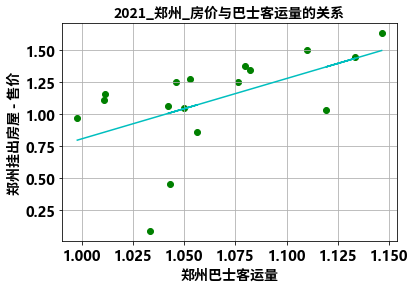

In [24]:
# 画图
plt.scatter(data['x'], y, color='green')
plt.plot(x, model.predict(x), 'c-')
plt.grid(True)
plt.title("2021_郑州_房价与巴士客运量的关系", fontproperties=zhongguo) 
plt.xlabel("郑州巴士客运量", fontproperties=zhongguo) 
plt.ylabel("郑州挂出房屋 - 售价", fontproperties=zhongguo) 
plt.show()

               y          x
count  17.000000  17.000000
mean    0.646924   0.993175
std     0.246624   0.058188
min     0.043758   0.792312
25%     0.591952   0.985449
50%     0.684670   1.010583
75%     0.761016   1.021633
max     1.013617   1.053225


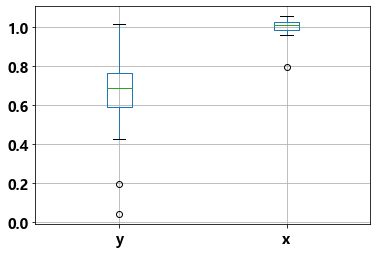

In [17]:
# 数据情况
print(data.describe())
data.boxplot()
plt.show()

# 聚类分析

In [ ]:
# fname 为 你下载的字体库路径，注意 SourceHanSansSC-Bold.otf 字体的路径 中文字体
zhongguo = matplotlib.font_manager.FontProperties(fname="/Users/19723/Desktop/API/字体/SourceHanSansSC-Bold.otf") 

In [ ]:
data = pd.read_excel('/Users/19723/Desktop/新房/新房des11.xlsx')
df = pd.DataFrame()
df = df.assign(mean1 = data['areamean'])
df = df.assign(mean2 = data['meipingmean'])
df.dropna(subset=['mean1'],inplace=True) #去除空值
df.dropna(subset=['mean2'],inplace=True) 

In [ ]:
prediction = KMeans(n_clusters=5).fit_predict(df[['mean1','mean2']])
df['cluster']=prediction
dataa = pd.DataFrame()


data1 = df[df.cluster==0]
km_res1 = KMeans(n_clusters = 1).fit(data1)
cluster1 = km_res1.cluster_centers_
plt.scatter(data1.mean1, data1.mean2, color = 'red')
plt.scatter(cluster1[:,0],cluster1[:,1], s=700, alpha = 0.7)
plt.savefig('fig1')

data2 = df[df.cluster==1]
km_res2 = KMeans(n_clusters = 1).fit(data2)
cluster2 = km_res2.cluster_centers_
plt.scatter(data2.mean1, data2.mean2, color = 'purple')
plt.scatter(cluster2[:,0],cluster2[:,1], s=700, alpha = 1)

data3 = df[df.cluster==2]
km_res3 = KMeans(n_clusters = 1).fit(data3)
cluster3 = km_res3.cluster_centers_
plt.scatter(data3.mean1, data3.mean2, color = 'blue')
plt.scatter(cluster3[:,0],cluster3[:,1], s=700, alpha = 0.7)

data4 = df[df.cluster==3]
km_res4 = KMeans(n_clusters = 1).fit(data4)
cluster4 = km_res4.cluster_centers_
plt.scatter(data4.mean1, data4.mean2, color = 'green')
plt.scatter(cluster4[:,0],cluster4[:,1], s=700, alpha = 0.7)

data5 = df[df.cluster==4]
km_res5 = KMeans(n_clusters = 1).fit(data5)
cluster5 = km_res5.cluster_centers_
plt.scatter(data5.mean1, data5.mean2, color = 'black')
plt.scatter(cluster5[:,0],cluster5[:,1], s=70, alpha = 0.7)

dataa = pd.concat([data1, data2, data3, data4, data5])

plt.xlabel('面积', fontproperties=zhongguo)
plt.ylabel('均价（元/月）', fontproperties=zhongguo)
plt.savefig('fig5')

In [ ]:
dataa.to_excel('/Users/19723/Desktop/新房总价面积.xlsx')
df = pd.read_excel('/Users/19723/Desktop/Book1.xlsx')
df = df.groupby(['rank', 'city']).describe()
df.to_excel('/Users/19723/Desktop/T.xlsx')

In [ ]:
### 欣赏数据
dataa

# 流动人口 - 挖掘网站上的客运量数据

In [ ]:
## 测试鼠标位置:pyautogui依据不同电脑屏幕分辨率获取屏幕上（x,y)坐标 - 校准
print(pyautogui.position())

In [ ]:
### 把交通官网上的链接保存为列表
List=pd.read_excel(r"C:/Users/19723/Desktop/城市客运.xls")
List

In [ ]:
for i in range(0, len(List)):
    #输入chrome网页链接
    time.sleep(2)
    pyautogui.click(472, 65) 
    time.sleep(0.2) 
    pyautogui.typewrite(List["链接"][i])
    time.sleep(2)
    pyautogui.press('enter')
    time.sleep(0.1)
    pyautogui.press('enter')
    time.sleep(5)
    
    pyautogui.keyDown('down')
    time.sleep(0.5)
    pyautogui.keyDown('down')
    time.sleep(0.7)
    
    pyautogui.click(1577, 946)
    pyautogui.click(1577, 946)
    time.sleep(0.9)
    pyautogui.click(1450, 889)
    pyautogui.click(1450, 889)
    time.sleep(1.5)
    pyautogui.click(753, 562)
    pyautogui.click(753, 562)

# 将保存的图片转换成excel - 必须有表格线，不然就要自己PS (现成的网站要收费，这个是免费的) - 用地结构可用

In [ ]:
# client_id 为官网获取的AK， client_secret 为官网获取的SK
host = 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id=NmPSifndGbLCA7k15IT0MnNg&client_secret=iMGqNbSIdUGDzt7EVhZPv4P3M5A9uii0'
response = requests.get(host)
if response:
    print(response.json())

""" 你的 APPID AK SK """
APP_ID = '24186023'
API_KEY = 'NmPSifndGbLCA7k15IT0MnNg'
SECRET_KEY = 'iMGqNbSIdUGDzt7EVhZPv4P3M5A9uii0'

client = AipOcr(APP_ID, API_KEY, SECRET_KEY)

In [ ]:
'''
表格文字识别(异步接口)
'''

request_url = "https://aip.baidubce.com/rest/2.0/solution/v1/form_ocr/request"
# 二进制方式打开图片文件
f = open('/Users/19723/Desktop/a39002bb77597a74b871b66d310e384.png', 'rb')
img = base64.b64encode(f.read())

params = {"image":img}
access_token = '24.7fce86f652a13b215840583acf5e4bab.2592000.1623894654.282335-24186023'
request_url = request_url + "?access_token=" + access_token
headers = {'content-type': 'application/x-www-form-urlencoded'}
response = requests.post(request_url, data=params, headers=headers)
if response:
    print (response.json())

In [ ]:
url = 'https://aip.baidubce.com/rest/2.0/solution/v1/form_ocr/get_request_result'
url = url + "?access_token=" + access_token
p = {
    'request_id': '24186023_2678735', # 取自上个代码的返回结果
    'result_type': 'excel' #返回类型
}

res = requests.post(url, data=p, headers=headers)
print('获取结果：', res.json())

# 中介数据去重

In [ ]:
#获取所有需要合并的工作簿路径，生成list
def file_name(file_dir): 
    list=[]
    for file in os.listdir(file_dir):
        if os.path.splitext(file)[1] == '.xlsx':
            list.append(file)
    return list

path = r'/Users/19723/Desktop/中介//'
wks = file_name(path)

data = []   #定义一个空list
for i in range(len(wks)):
    read_xlsx = xlrd.open_workbook(path + '//' + wks[i])
    sheet1 = read_xlsx.sheets()[0] #查看sheet1的数据
    nrow =  sheet1.nrows
    title = sheet1.row_values(0)   #查看第1行数据
    for j in range(1,nrow): #逐行打印
        data.append(sheet1.row_values(j))

content= pd.DataFrame(data)
#修改标题
content.columns= title
#写入文件
#写入csv文件
#content.to_csv(path+'\\py_union.xlsx', sep=',', header=True, index=False)
#写入excel文件
content.to_excel(path+'//py.xlsx', header=True, index=False)

In [ ]:
data = pd.read_excel('/Users/19723/Desktop/中介/py.xlsx', encoding = 'UTF-8')
data.drop_duplicates('公司名称', 'first', inplace = True)
data.to_csv('/Users/19723/Desktop/中介数据.csv', encoding = 'UTF-8')
data.to_excel('/Users/19723/Desktop/中介数据.xls', encoding = 'UTF-8')

In [ ]:
data = pd.read_excel('/Users/19723/Desktop/testt.xlsx', encoding = 'UTF-8')
data = data.groupby(['城市', '年份']).count()
data.to_excel('/Users/19723/Desktop/ts.xlsx')

# 恒大图片截图

In [ ]:
tod = datetime.datetime.strftime(datetime.datetime.now(),'%m_%d_%H_%M_%S')
tod

In [ ]:
def get11(url):
    driver = webdriver.Chrome()
    driver.fullscreen_window() # 全屏窗口
    driver.get(url)
    driver.fullscreen_window() # 全屏窗口

    window_height = driver.get_window_size()['height'] # 窗口高度
    page_height = driver.execute_script('return document.documentElement.scrollHeight') # 页面高度

    sleep(3)
    
    # 截屏
    driver.save_screenshot(f'C:/Users/19723/Desktop/API/截图/temp/qq_{x}.png')

    if page_height > window_height:
        n = page_height // window_height# 需要滚动的次数
        base_mat = np.atleast_2d(Image.open(f'C:/Users/19723/Desktop/API/截图/temp/qq_{x}.png')) # 打开截图并转为二维矩阵

        for i in range(n):
            driver.execute_script(f'document.documentElement.scrollTop={window_height*(i+1)};')
            sleep(.5)
            driver.save_screenshot(f'C:/Users/19723/Desktop/API/截图/temp/qq_{i}.png') # 保存截图
            mat = np.atleast_2d(Image.open(f'C:/Users/19723/Desktop/API/截图/temp/qq_{i}.png')) # 打开截图并转为二维矩阵
            base_mat = np.append(base_mat, mat, axis=0) # 拼接图片的二维矩阵
            Image.fromarray(base_mat).save(f'./客运{x}.png')

    driver.quit()
    
    
    
    
def get22(url):
    driver = webdriver.Chrome()
    driver.fullscreen_window() # 全屏窗口
    driver.get(url)
    driver.fullscreen_window() # 全屏窗口

    window_height = driver.get_window_size()['height'] # 窗口高度
    page_height = driver.execute_script('return document.documentElement.scrollHeight') # 页面高度

    sleep(3)
    pyautogui.click(457, 318)  
    pyautogui.click(457, 318) 
    driver.fullscreen_window() # 全屏窗口
    sleep(2)
    
    # 截屏
    driver.save_screenshot(f'C:/Users/19723/Desktop/API/截图/temp/qqq_{x}.png')

    if page_height > window_height:
        n = page_height // window_height # 需要滚动的次数
        base_mat = np.atleast_2d(Image.open(f'C:/Users/19723/Desktop/API/截图/temp/qqq_{x}.png')) # 打开截图并转为二维矩阵

        for i in range(n):
            driver.execute_script(f'document.documentElement.scrollTop={window_height*(i+1)};')
            sleep(.5)
            driver.save_screenshot(f'C:/Users/19723/Desktop/API/截图/temp/qqq_{i}.png') # 保存截图
            mat = np.atleast_2d(Image.open(f'C:/Users/19723/Desktop/API/截图/temp/qqq_{i}.png')) # 打开截图并转为二维矩阵
            base_mat = np.append(base_mat, mat, axis=0) # 拼接图片的二维矩阵
            Image.fromarray(base_mat).save(f'./客运2{x}.png')

    driver.quit()
    
    
    
def get33(url):
    driver = webdriver.Chrome()
    driver.fullscreen_window() # 全屏窗口
    driver.get(url)
    driver.fullscreen_window() # 全屏窗口

    window_height = driver.get_window_size()['height'] # 窗口高度
    page_height = driver.execute_script('return document.documentElement.scrollHeight') # 页面高度

    sleep(3)
    pyautogui.click(464, 358)  
    pyautogui.click(457, 358) 
    driver.fullscreen_window() # 全屏窗口
    sleep(2)
    
    # 截屏
    driver.save_screenshot(f'C:/Users/19723/Desktop/API/截图/temp/qqqq_{x}.png')

    if page_height > window_height:
        n = page_height // window_height # 需要滚动的次数
        base_mat = np.atleast_2d(Image.open(f'C:/Users/19723/Desktop/API/截图/temp/qqqq_{x}.png')) # 打开截图并转为二维矩阵

        for i in range(n):
            driver.execute_script(f'document.documentElement.scrollTop={window_height*(i+1)};')
            sleep(.5)
            driver.save_screenshot(f'C:/Users/19723/Desktop/API/截图/temp/qqqq_{i}.png') # 保存截图
            mat = np.atleast_2d(Image.open(f'C:/Users/19723/Desktop/API/截图/temp/qqqq_{i}.png')) # 打开截图并转为二维矩阵
            base_mat = np.append(base_mat, mat, axis=0) # 拼接图片的二维矩阵
            Image.fromarray(base_mat).save(f'./客运3{x}.png')

    driver.quit()


def happyhappy(url):
    get11(url)
#     get22(url)
#     get33(url)

In [ ]:
happyhappy('http://114.217.148.213:9999/SUNTWEBHOUSEINFO/OUT/PermitHouseInfo.aspx?kdam=YS20160100&code=2e23b645997d155f3b2c825887ea1026')

## 列表循环截图

In [ ]:
# import xlrd
# data = xlrd.open_workbook('/Users/19723/Desktop/城市客运.xls')
# st = data.sheets()[0] #读取第一个表
# st1 = st.col_values(0) #读取第二列

# for x in range(0, 10000):
#     get11(st1[x])
# #     get22(st1[x])
# #     get33(st1[x])

## 合并图片

In [ ]:

import os

import PIL.Image as Image

IMAGES_PATH = r'/Users/19723/Desktop/t//'  # 图片集地址
IMAGES_FORMAT = ['.jpg', '.png']  # 图片格式
IMAGE_SIZE = 256  # 每张小图片的大小

IMAGE_COLUMN = 5  # 图片间隔，也就是合并成一张图后，一共有几列
IMAGE_SAVE_PATH = r'/Users/19723/Desktop/123123123.png'  # 图片转换后的地址
# 获取图片集地址下的所有图片名称
image_names = [name for name in os.listdir(IMAGES_PATH) for item in IMAGES_FORMAT if
               os.path.splitext(name)[1] == item]
# IMAGE_ROW = 4  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_ROW_yu = len(image_names) % IMAGE_COLUMN
if IMAGE_ROW_yu == 0:
    IMAGE_ROW = len(image_names) // IMAGE_COLUMN
else:
    IMAGE_ROW = len(image_names) // IMAGE_COLUMN + 1

print("image_names", image_names)


# 定义图像拼接函数
def image_compose():
    to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))  # 创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    total_num = 0
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(IMAGES_PATH + image_names[IMAGE_COLUMN * (y - 1) + x - 1]).resize(
                (IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE, (y - 1) * IMAGE_SIZE))
            total_num += 1
            if total_num == len(image_names):
                break
    return to_image.save(IMAGE_SAVE_PATH)  # 保存新图


image_compose()  # 调用函数

# 房价分布 

In [110]:
df = pd.read_excel('/Users/19723/Desktop/TEST1.xlsx')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       2925 non-null   float64
 1   loupanprc  2925 non-null   float64
 2   Strict     2925 non-null   object 
 3   Prc        2925 non-null   float64
dtypes: float64(3), object(1)
memory usage: 91.5+ KB


,area,loupanprc,Strict,Prc
0,46.00,110.0,宝山,2.391304
1,46.00,92.0,宝山,2.000000
2,46.00,92.0,宝山,2.000000
3,47.43,90.0,宝山,1.897533
4,47.43,90.0,宝山,1.897533
...,...,...,...,...
2920,5000.00,15000.0,长宁,3.000000
2921,5000.00,13000.0,长宁,2.600000
2922,5000.00,13000.0,长宁,2.600000
2923,5122.00,15400.0,长宁,3.006638


In [111]:
df = pd.read_excel('/Users/19723/Desktop/TEST1.xlsx')
df.info()
df = df.loc[df['Strict'].isin(['长宁'])]
df

,area,loupanprc,Strict,Prc
2720,39.00,120.0,长宁,3.076923
2721,40.00,150.0,长宁,3.750000
2722,40.00,82.0,长宁,2.050000
2723,47.00,92.0,长宁,1.957447
2724,50.00,160.0,长宁,3.200000
...,...,...,...,...
2920,5000.00,15000.0,长宁,3.000000
2921,5000.00,13000.0,长宁,2.600000
2922,5000.00,13000.0,长宁,2.600000
2923,5122.00,15400.0,长宁,3.006638


In [112]:
#字体
zhongguo = matplotlib.font_manager.FontProperties(fname="/Users/19723/Desktop/API/字体/SourceHanSansSC-Bold.otf") 

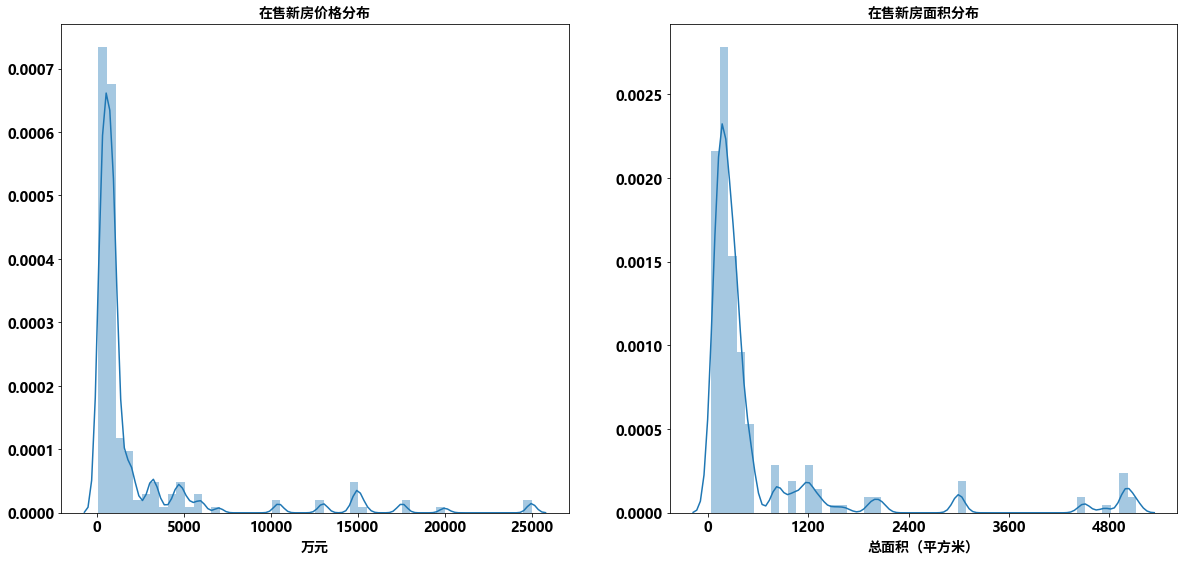

In [116]:
# plt.figure(figsize=(12, 6))
# df.总价.plot(kind="hist", ax=ax)
fig, ax = plt.subplots(1, 2, figsize=(20, 9))

# bin_edges = np.arange(0, df['totalprc'].max()+1, 15)
# ax[0].hist(data=df, x='总价', bins=bin_edges, color="#A5C8E1")
# xticks = np.arange(0, df.totalprc.max()+5, 100)
# ax[0].set_xticks(ticks=xticks)
# ax[0].set_xticklabels(labels=["%d" % i for i in xticks])
# ax[0].set_xlabel("总价(万元)", fontsize=15, fontproperties=zhongguo)
# ax[0].set_title("在售二手房价格分布", fontsize=20, fontproperties=zhongguo)

sns.distplot(df.loupanprc, ax=ax[0])
ax[0].set_xlabel("万元", fontsize=15, fontproperties=zhongguo)
ax[0].set_title("在售新房价格分布", fontsize=20, fontproperties=zhongguo)
xticks = np.arange(0, df.loupanprc.max()+50, 5000)
ax[0].set_xticks(ticks=xticks)
ax[0].set_xticklabels(labels=["%d" % i for i in xticks])

# 面积
sns.distplot(df.area, ax=ax[1])
ax[1].set_xlabel("总面积（平方米）", fontsize=15, fontproperties=zhongguo)
ax[1].set_title("在售新房面积分布", fontsize=20, fontproperties=zhongguo)
xticks = np.arange(0, df.area.max()+500, 1200)
ax[1].set_xticks(ticks=xticks)
ax[1].set_xticklabels(labels=["%d" % i for i in xticks])

# # 单价
# sns.distplot(df.Prc, ax=ax[2])
# ax[2].set_xlabel("单价（万元/平方米）", fontsize=15, fontproperties=zhongguo)
# ax[2].set_title("在售新房单价分布", fontsize=20, fontproperties=zhongguo)
# xticks = np.arange(0, df.Prc.max()+500, 100)
# ax[2].set_xticks(ticks=xticks)
# ax[2].set_xticklabels(labels=["%d" % i for i in xticks])
plt.show()

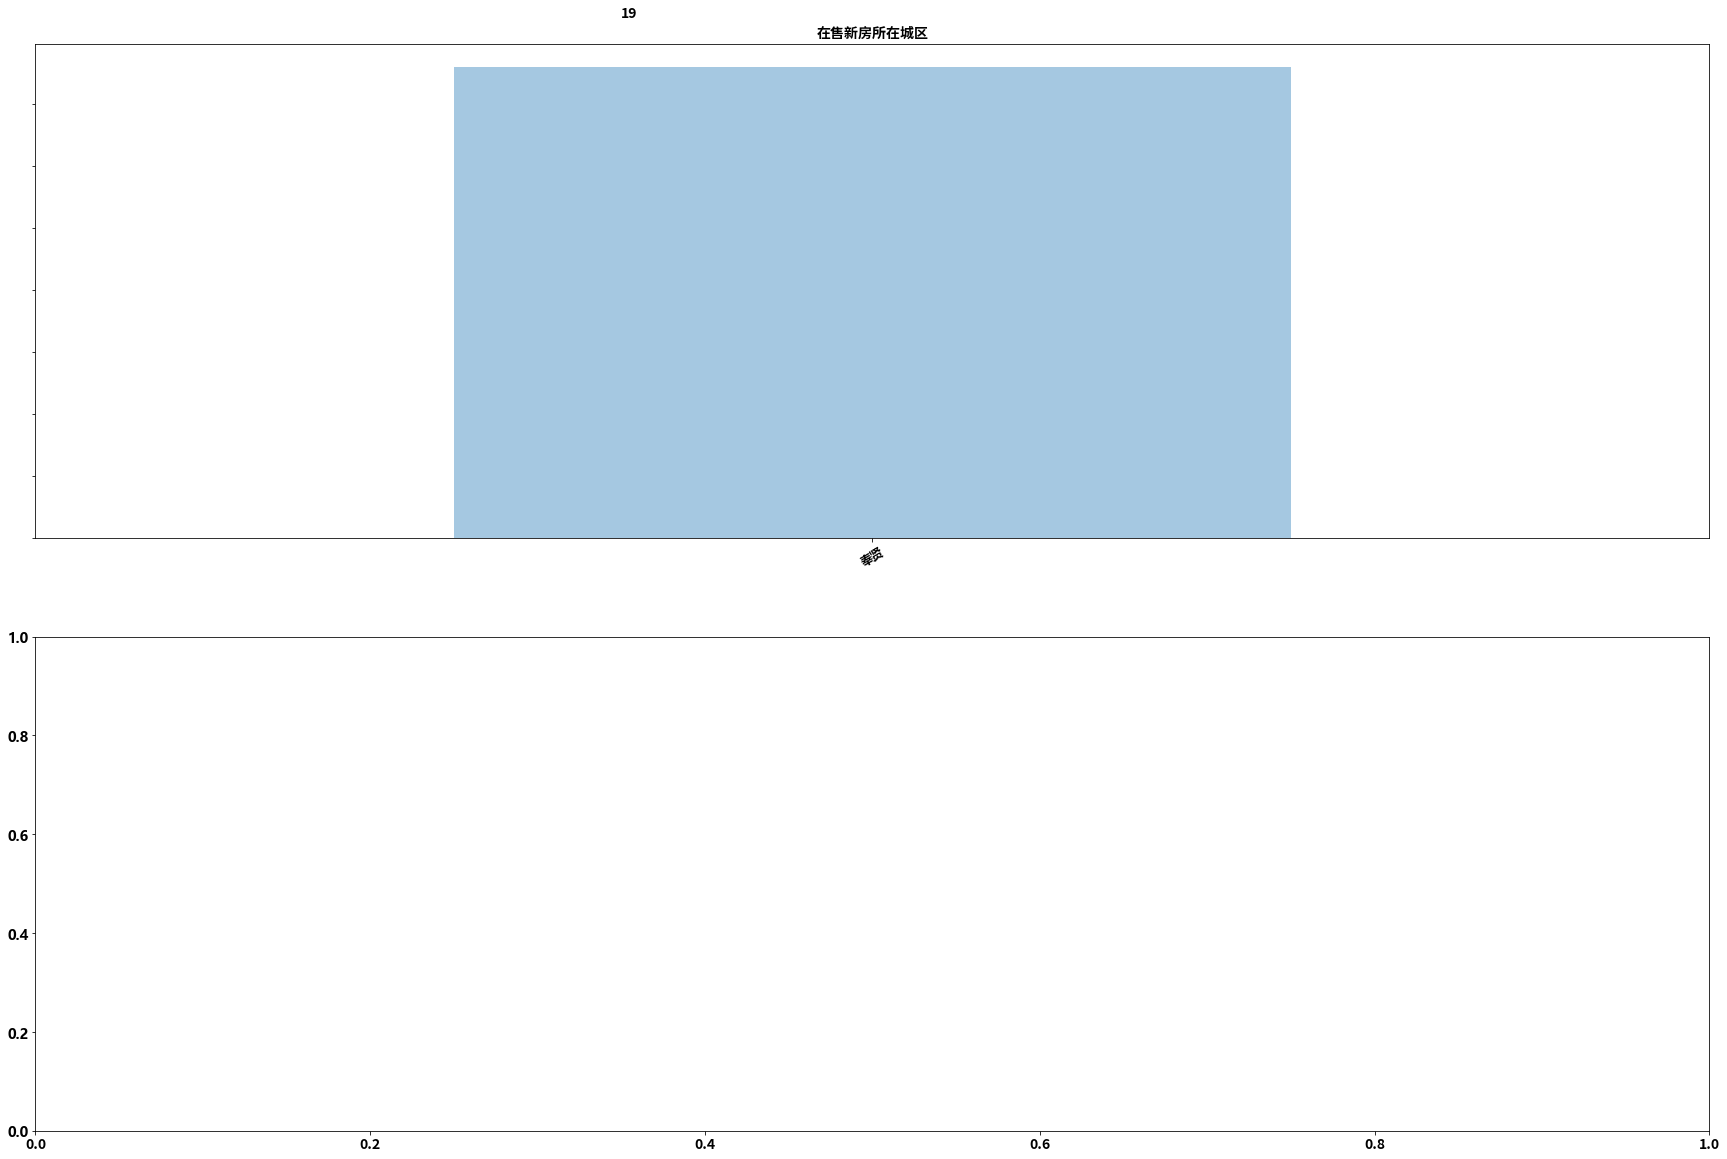

In [21]:
ax = plt.subplots(2,1, figsize=(30, 20))
df["Strict"].value_counts(dropna=False).plot(kind="bar", ax=ax[1][0], rot=30, color="#A5C8E1", fontsize=12)
ax[1][0].set_yticklabels("")
# ax.set_axis_off()
for index, value in enumerate(df["Strict"].value_counts(dropna=False)):
    ax[1][0].text(x=index-.15, y=value+2, s=value, fontdict={"size": 10}, fontproperties=zhongguo)
ax[1][0].set_title("在售新房所在城区", fontsize=15, fontproperties=zhongguo)
# ax[1][0].axes.tick_params(labelleft=False, left=False)



##----------
# df["Time"].value_counts(dropna=False).plot(kind="bar", ax=ax[1][1], rot=30, color="#A5C8E1", fontsize=12)
# ax[1][1].set_yticklabels("")
# # ax.set_axis_off()
# for index, value in enumerate(df["Time"].value_counts(dropna=False)):
#     ax[1][1].text(x=index-.15, y=value+2, s=value, fontdict={"size": 10}, fontproperties=zhongguo)
# ax[1][1].set_title("在售新房上市时间", fontsize=15, fontproperties=zhongguo)
# # ax[1][0].axes.tick_params(labelleft=False, left=False)
##--------------
plt.xticks(fontproperties=zhongguo)
plt.show()

### 自回归 ARIMA

In [122]:
!pip install pmdarima

In [2]:
import numpy as np
import datetime as dt 
import pandas as pd
import pandas_datareader.data as web
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('/Users/19723/Desktop/TEST1.xlsx')
df.info()
df = df.loc[df['Strict'].isin(['长宁'])]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       2925 non-null   float64
 1   loupanprc  2925 non-null   float64
 2   Strict     2925 non-null   object 
 3   Prc        2925 non-null   float64
dtypes: float64(3), object(1)
memory usage: 91.5+ KB


In [4]:
df

,area,loupanprc,Strict,Prc
2720,39.00,120.0,长宁,3.076923
2721,40.00,150.0,长宁,3.750000
2722,40.00,82.0,长宁,2.050000
2723,47.00,92.0,长宁,1.957447
2724,50.00,160.0,长宁,3.200000
...,...,...,...,...
2920,5000.00,15000.0,长宁,3.000000
2921,5000.00,13000.0,长宁,2.600000
2922,5000.00,13000.0,长宁,2.600000
2923,5122.00,15400.0,长宁,3.006638


In [ ]:
#设置一下时间索引，这一步很有必要，否则后面程序会报错
df.index=pd.Index(pd.date_range('1/2001','9/2008',freq='1M'))
sales['Sales'].plot()
sales['Sales'].diff(1).plot() #可以看出1阶差分后是一个零均值化的平稳序列,第一个数是NaN

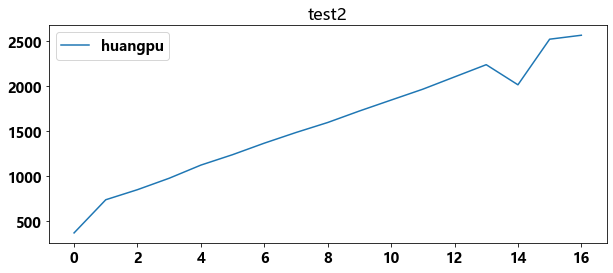

In [205]:
df = pd.read_excel('/Users/19723/Desktop/test2.xlsx')
# Plot historical price data
plt.figure(figsize=(10,4))
plt.title('test2')
plt.plot(df['闵行'], label='huangpu')
plt.legend()
plt.show()

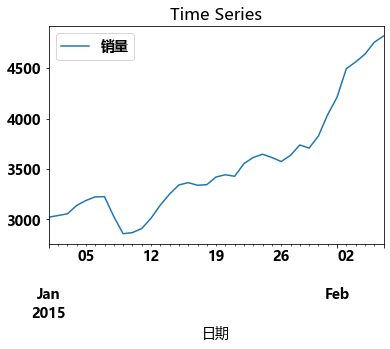

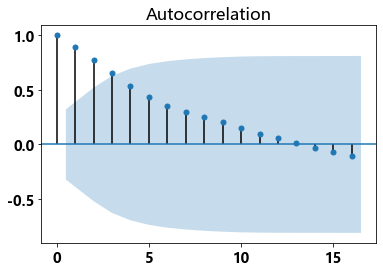

原始序列的ADF检验结果为： (1.8137710150945243, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.46989866024177)


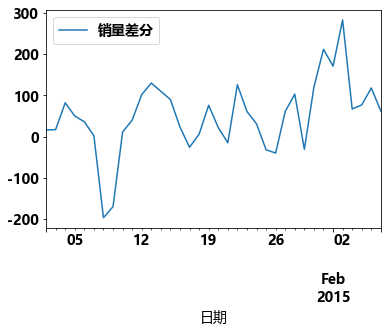

<ipython-input-213-2a9ba74cd2e6>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show()
<ipython-input-213-2a9ba74cd2e6>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(D_data).show()
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\ba

1阶差分序列的ADF检验结果为： (-3.1560562366723532, 0.02267343544004886, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)
差分序列的白噪声检验结果为： (array([11.30402222]), array([0.00077339]))


C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information

            0           1           2           3
0  432.068472  422.510082  426.088911  426.595507
1  423.628276  426.073601         NaN         NaN
2  426.774824         NaN         NaN         NaN
3  430.317524         NaN         NaN  436.478109
bic最小的P值和q值为：0、1
(array([4873.9662593 , 4923.9219048 , 4973.87755029, 5023.83319579,
       5073.78884128]), array([ 73.08574346, 142.32678677, 187.54280196, 223.80279467,
       254.95701449]), array([[4730.72083433, 5017.21168428],
       [4644.96652869, 5202.8772809 ],
       [4606.30041289, 5341.45468769],
       [4585.1877786 , 5462.47861298],
       [4574.08227528, 5573.49540728]]))


C:\Users\19723\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\19723\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


NameError: name 'false' is not defined

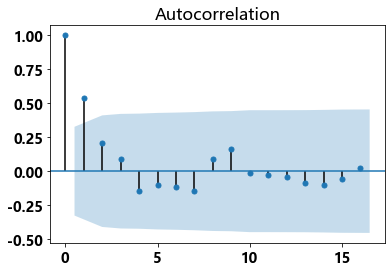

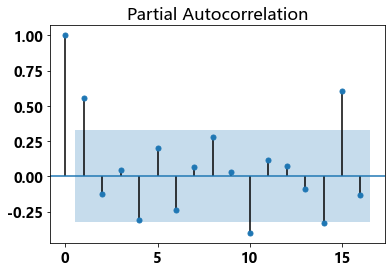

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
filename='/Users/19723/Desktop/arima_data.xls'
forrecastnum=5
data=pd.read_excel(filename,index_col=u'日期')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data.plot()
plt.title('Time Series')
plt.show()
plot_acf(data)
plt.show()
print(u'原始序列的ADF检验结果为：',ADF(data[u'销量']))
D_data=data.diff(periods=1).dropna()
D_data.columns=[u'销量差分']
D_data.plot()
plt.show()
plot_acf(D_data).show()
plot_pacf(D_data).show()
print(u'1阶差分序列的ADF检验结果为：',ADF(D_data[u'销量差分']))
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：',acorr_ljungbox(D_data,lags=1))
from statsmodels.tsa.arima_model import ARIMA
data[u'销量'] = data[u'销量'].astype(float)
pmax=int(len(D_data)/10)
qmax=int(len(D_data)/10)
bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix=pd.DataFrame(bic_matrix)
print(bic_matrix)
p,q=bic_matrix.stack().idxmin()
print(u'bic最小的P值和q值为：%s、%s'%(p,q))
model=ARIMA(data,(p,1,q)).fit()
model.summary2()
forecast=model.forecast(5)
print(forecast)





{"mode":"full","isActive":false}

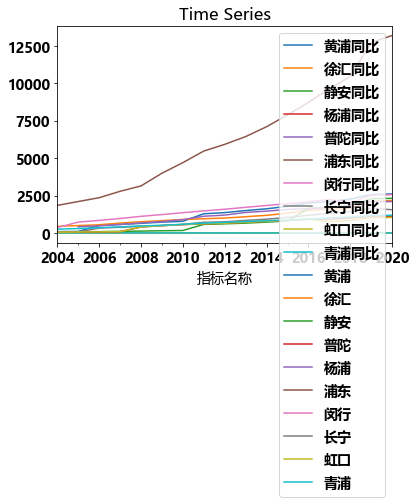

ValueError: x is required to have ndim 1 but has ndim 2

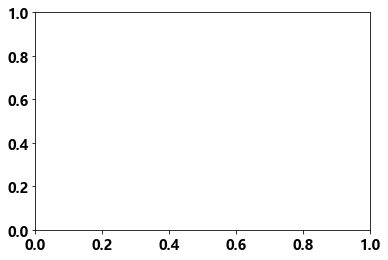

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
filename='/Users/19723/Desktop/test2.xlsx'
forrecastnum=5
data=pd.read_excel(filename,index_col=u'指标名称')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data.plot()
plt.title('Time Series')
plt.show()
plot_acf(data)
plt.show()
print(u'原始序列的ADF检验结果为：',ADF(data[u'黄浦']))
D_data=data.diff(periods=1).dropna()
D_data.columns=[u'huangpu']
D_data.plot()
plt.show()
plot_acf(D_data).show()
plot_pacf(D_data).show()
print(u'1阶差分序列的ADF检验结果为：',ADF(D_data[u'huangpu']))
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：',acorr_ljungbox(D_data,lags=1))
from statsmodels.tsa.arima_model import ARIMA
data[u'销量'] = data[u'销量'].astype(float)
pmax=int(len(D_data)/10)
qmax=int(len(D_data)/10)
bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix=pd.DataFrame(bic_matrix)
print(bic_matrix)
p,q=bic_matrix.stack().idxmin()
print(u'bic最小的P值和q值为：%s、%s'%(p,q))
model=ARIMA(data,(p,1,q)).fit()
model.summary2()
forecast=model.forecast(5)
print(forecast)





{"mode":"full","isActive":false}

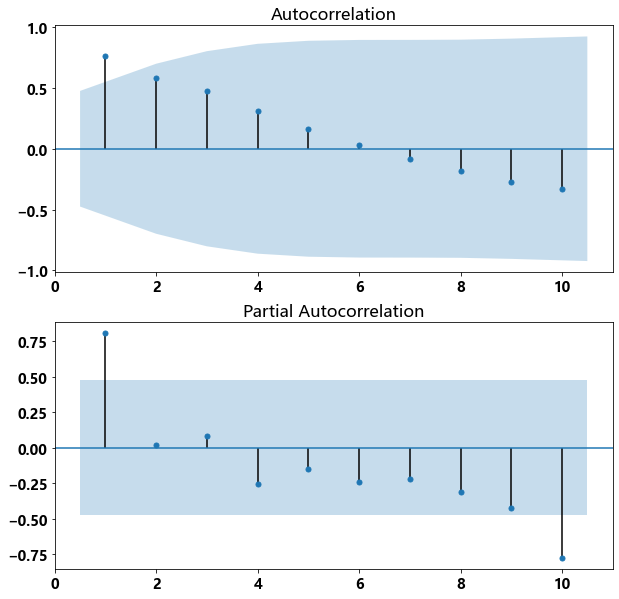

In [206]:
# ACF and PACF plots of time series
def plot_acf_pacf(df):
    # Create figure
    fig, ax = plt.subplots(2, figsize=(10,10))
    # Make ACF plot
    plot_acf(df, lags=10, zero=False, ax=ax[0])
    # Make PACF plot
    plot_pacf(df, lags=10, zero=False, ax=ax[1])
    # Show plots
    return plt.show()

plot_acf_pacf(df['闵行'])

ADF Statistic: -4.381583
p-value: 0.000320
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691


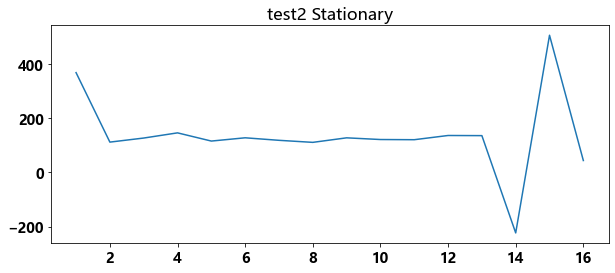

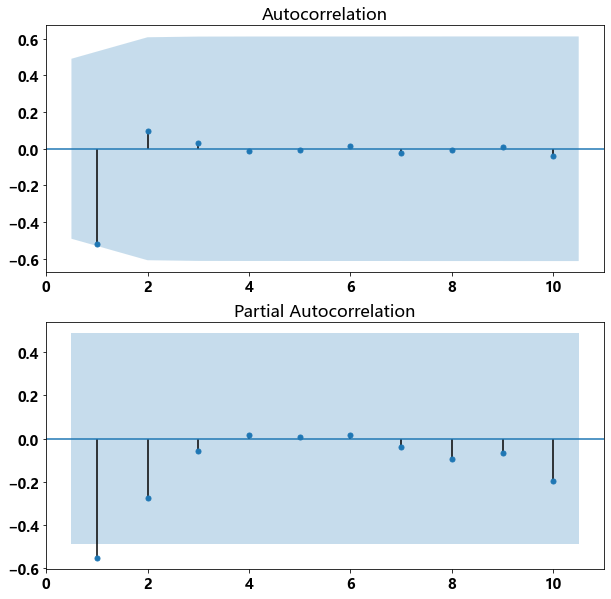

In [207]:
# Transform data from non-stationary to stationary
X = df.闵行
# Method 1: difference data
stationary = X.diff(1)
# # Method 2: take the log
# stationary = np.log(X)
# # Method 3: take the square root 
# stationary = np.sqrt(X)
# # Method 4: take the proprtional change
# stationary = X.pct_change(1)
stationary.dropna(axis=0, inplace=True)

# The augmented Dicky-Fuller test - check if stationary
result = adfuller(stationary)
# test statistic - more negative means more likely to be stationary
print('ADF Statistic: %f' % result[0])
# p-value - reject null hypothesis: non-stationary
print('p-value: %f' % result[1])
# critical test statistics - p-values: test statistic for null hypothesis
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# plot stationary dataset
stationary.plot(figsize=(10,4))
plt.title('test2'+' Stationary')
plt.show()

# plot ACF & PACF of stationary dataset
plot_acf_pacf(stationary)

In [208]:
# Searching over SARIMA model orders
class Auto_Arima():
    def __init__(self, df, start_p=1, start_q=1, max_p=10, max_q=10,\
        seasonal=False, information_criterion='aic'):
        self.df = df
        self.start_p = start_p
        self.start_q = start_q
        self.max_p = max_p
        self.max_q = max_q
        self.seasonal = seasonal
        self.information_criterion = information_criterion

    def arima_results(self):
        results = pm.auto_arima(
            self.df,
            start_p = self.start_p,
            start_q = self.start_q,
            max_p = self.max_p,
            max_q = self.max_q,
            seasonal = self.seasonal,
            # m = 14,
            # D = 1,
            # start_P = 1,
            # start_Q = 1,
            # max_P = 10,
            # max_Q = 10,
            information_criterion = self.information_criterion,
            trace = False,
            error_action = 'ignore',
            suppress_warnings=True,
            stepwise = True,
            scoring = 'mse'
        )
        return results

Train: 11, Test: 6


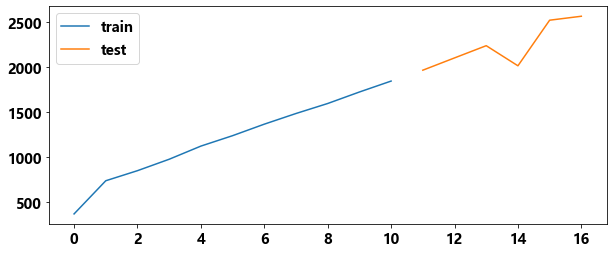

In [209]:
# Train test split
def train_test_split(X, size=0.7):
    train = X[:int(X.shape[0]*size)]
    test = X[int(X.shape[0]*size):]
    return train, test

train, test = train_test_split(X=df['闵行'], size=0.7)
print(f'Train: {len(train)}, Test: {len(test)}')

# Plot train & test datasets
fig, ax = plt.subplots(figsize=(10,4))
train.plot(ax=ax, label='train')
test.plot(ax=ax, label='test')
ax.legend()
plt.show()

In [210]:
def plot_train_test(train, test, df):
    # Plot the predictions for validation set
    plt.figure(figsize=(10,4))
    plt.plot(train, label='train')
    plt.plot(test, label='test')
    plt.plot(df, label='predicted')
    plt.legend()
    plt.show()

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, df))
    print(f'RMSE: {rmse:.2f}')

In [211]:
# Fit model with auto-arima
arima_model = Auto_Arima(train)
results = arima_model.arima_results()
# Check residuals
# Prob(Q) - p-value for null hypothesis that residuals are uncorrelated
# Prob(JB) - p-value for null hypothesis that residuals are normal
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -57.277
Date:                Thu, 15 Jul 2021   AIC                            118.555
Time:                        14:43:27   BIC                            119.160
Sample:                             0   HQIC                           117.891
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    147.7730    150.108      0.984      0.325    -146.433     441.979
sigma2      5528.2027   8530.050      0.648      0.517   -1.12e+04    2.22e+04
Ljung-Box (Q):                        2.66   Jarque-

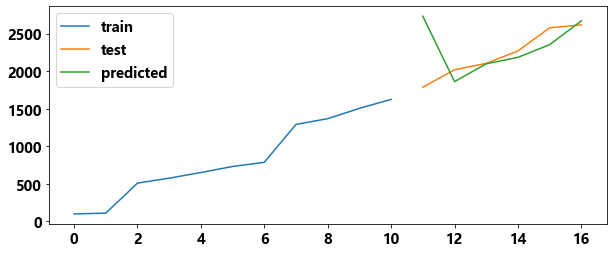

RMSE: 403.70


In [141]:
# ARIMA multi-step-forecast is pretty bad, so let's compare it with one-step-forecast
def one_step_forecast():
    predicted, conf_int = results.predict(n_periods=1, return_conf_int=True)
    return (
        predicted.tolist()[0],
        np.asarray(conf_int).tolist()[0])

predictions = []
confidence_intervals = []

for x in test:
    predicted, conf = one_step_forecast()
    predictions.append(predicted)
    confidence_intervals.append(conf)

    # Updates the existing model
    results.update(x)
# Out-of-sample one-step-forecast based on auto_arima results
predicted = pd.DataFrame(predictions, index=test.index, columns=['predicted'])

# Plot real price vs one-step-forecast
plot_train_test(train, test, predicted)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
# print(f'RMSE: {rmse:.2f}')

In [142]:
# ARIMA multi-step-forecast is pretty bad, so let's compare it with one-step-forecast
def one_step_forecast():
    predicted, conf_int = results.predict(n_periods=1, return_conf_int=True)
    return (
        predicted.tolist()[0],
        np.asarray(conf_int).tolist()[0])

predictions = []
confidence_intervals = []

for x in test:
    predicted, conf = one_step_forecast()
    predictions.append(predicted)
    confidence_intervals.append(conf)

    # Updates the existing model
    results.update(x)

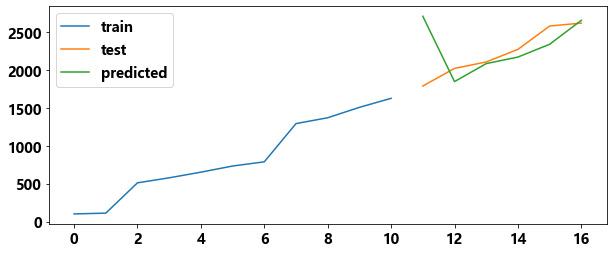

RMSE: 397.27


In [143]:
# Out-of-sample one-step-forecast based on auto_arima results
predicted = pd.DataFrame(predictions, index=test.index, columns=['predicted'])

# Plot real price vs one-step-forecast
plot_train_test(train, test, predicted)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
# print(f'RMSE: {rmse:.2f}')

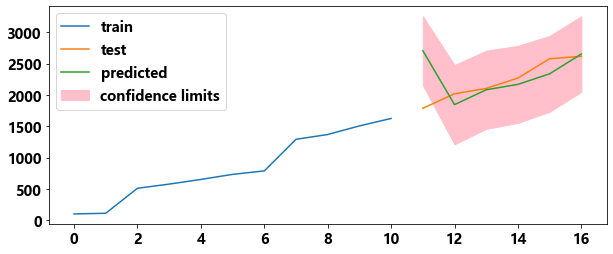

In [144]:
# Forecast with confidence intervals
lower_limits = [row[0] for row in confidence_intervals]
upper_limits = [row[1] for row in confidence_intervals]
# Plot predictions with conf_int
plt.figure(figsize=(10,4))
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(predicted, label='predicted')
plt.fill_between(test.index, lower_limits,
		 upper_limits, color='pink', label='confidence limits')
plt.legend()
plt.show()

###

In [155]:
#Let's make predictions other way
# SARIMAX 
# one-step-ahead in-sample predictions with uncertainty
def sarimax_model(df, trend='ct', steps=10, dynamic=False):
    model = SARIMAX(df, order=(7,1,7), trend=trend)
    results = model.fit()
    one_step_forecast = results.get_prediction(start=-steps, dynamic=dynamic)
    # Get in-sample predicted mean values
    predictions = one_step_forecast.predicted_mean
    # Get confidence intervals of in-sample forecasts
    confidence_intervals = one_step_forecast.conf_int()
    lower_limits = confidence_intervals['lower Close']
    upper_limits = confidence_intervals['upper Close']
    return predictions, lower_limits, upper_limits

ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

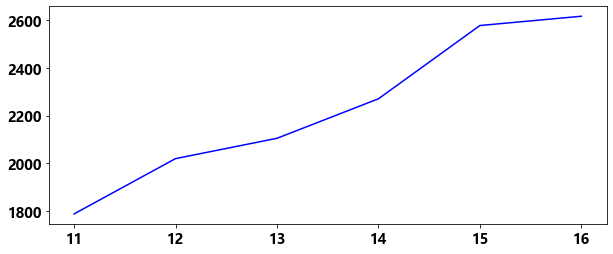

In [149]:
# Plot real data
def plot_sarimax_pred(df, steps=100):
    plt.figure(figsize=(10,4))
    plt.plot(df.index[-steps:], df[-steps:], 
            color='b', label='real data')
    # Plot predictions 
    plt.plot(predictions.index, predictions, 
            color='g', label='predicted')
    # Plot confidence limits
    plt.fill_between(lower_limits.index, lower_limits,
            upper_limits, color='pink', label='confidence limits')
    plt.legend()
    plt.show()

In [151]:
%%capture
# Dynamic forecast for next 50 days
# Run model
predictions, lower_limits, upper_limits =\
    sarimax_model(df=df['黄浦'], trend='ct', steps=50, dynamic=True)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
# Plot dynamic forecast
plot_sarimax_pred(df=df['Close'], steps=400)

In [156]:
%%capture
# One-step-forecast for next 50 days
# Run model
predictions, lower_limits, upper_limits =\
    sarimax_model(df=df['黄浦'], trend='ct', steps=10, dynamic=False)

KeyError: 'lower Close'

ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

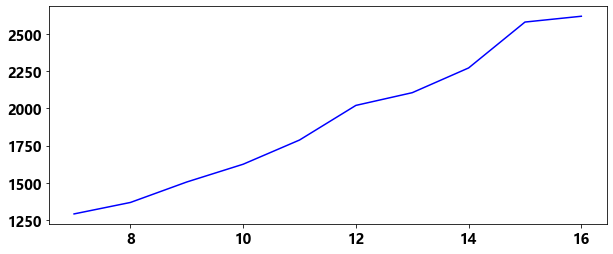

In [153]:
# Plot one-step-forecast for comparison with multi-step-forecast
plot_sarimax_pred(df=df['黄浦'], steps=10)

In [154]:
# Compare predictions with real data
forecast_vs_real = pd.concat([round(df['黄浦'][-10:],2), round(predictions,2)], axis=1)
forecast_vs_real.columns = ['Real Price', 'Forecast']
forecast_vs_real['Error_%'] = round(abs(forecast_vs_real['Forecast'] - forecast_vs_real['Real Price'])/\
                        forecast_vs_real['Real Price'] * 100, 1)
print(forecast_vs_real.head(5))
print()
print(f"Mean error: {round(forecast_vs_real['Error_%'].mean(),1)} %")

TypeError: type list doesn't define __round__ method

<ipython-input-215-9e89a4ad5143>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


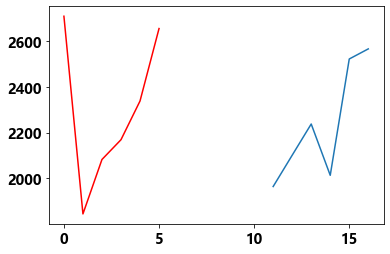

In [215]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast()
yhat = output[0]
predictions.append(yhat)
obs = test[t]
history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [185]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/19723/Desktop/Book2.csv', index_col='指标名称', parse_dates=True)
df.index = pd.Index(pd.date_range('2008', '2021', freq='1y'))
df = df.fillna(0)
# df[['黄浦']] = df[['黄浦']].astype('float')

In [244]:
abc = '普陀区'

In [245]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
#建立ARIMA模型
model=sm.tsa.ARMA(df[abc].diff(1).iloc[0:58].dropna(),(0,2)).fit(method='css') #使用最小二乘css，‘mle’是极大似然估计
# #画图比较一下预测值和真实观测值之间的关系
# fig=plt.figure(figsize=(8,6))
# ax=fig.add_subplot(111)
# ax.plot(df[abc].diff(1).iloc[0:30],color='blue',label='Actual diff')
# ax.plot(model.fittedvalues,color='red',label='Predicted GDP diff')
# plt.legend(loc='lower right') #画图

In [246]:
#最后，把预测值还原为原始数据的形式，预测值是差分数值，需要转化
def forecast(step,var,modelname):
    diff=list(modelname.predict(len(var)-1,len(var)-1+step,dynamic=True))
    prediction=[]
    prediction.append(var[len(var)-1])
    seq=[]
    seq.append(var[len(var)-1])
    seq.extend(diff)
    for i in range(step):
        v=prediction[i]+seq[i+1]
        prediction.append(v)

    prediction=pd.DataFrame({'Predicted Sales':prediction})
    return prediction[1:]  #第一个值是原序列最后一个值，故第二个值是预测值。

forecast(1,df[abc],model)

,Predicted Sales
1,10.546426


In [231]:
# check for stationarity
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF :", dftest[0])
    print("2. P-value", dftest[1])
    for key, val in dftest[4].items():
        print("\t", key, ":", val)

In [235]:
ad_test(df['黄浦同比'])

1. ADF : 0.9869096625333439
2. P-value 0.9941258920205369
	 1% : -4.331573
	 5% : -3.23295
	 10% : -2.7487


In [236]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [258]:
from statsmodels.tsa.arima_model import ARIMA
def train_test_split(X, size=0.7):
    train = X[:int(X.shape[0]*size)]
    test = X[int(X.shape[0]*size):]
    return train, test

train, test = train_test_split(X=df['黄浦同比'], size=0.7)

model = ARIMA(train,order=(1,0,1))
model = model.fit()
model.summary()

ValueError: The model specification cannot be estimated. The model contains 7 regressors (0 trend, 0 seasonal, 7 lags) but after adjustment for hold_back and creation of the lags, there are only 4 data points available to estimate parameters.